<a href="https://colab.research.google.com/github/TOKTAK007/Image-Segment/blob/main/Titanic_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Data set/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Colab Notebooks/Data set/train.csv
/content/drive/MyDrive/Colab Notebooks/Data set/test.csv
/content/drive/MyDrive/Colab Notebooks/Data set/gender_submission.csv


"OS" ย่อมาจาก "Operating System" หรือภาษาไทยเรียกว่า "ระบบปฏิบัติการ" ซึ่งเป็นซอฟต์แวร์ที่ควบคุมการทำงานของคอมพิวเตอร์ และให้บริการต่างๆ ให้กับแอปพลิเคชันและผู้ใช้งาน เช่น การจัดการหน่วยความจำ การเข้าถึงไฟล์ การเชื่อมต่อกับอินเตอร์เน็ต การจัดการฮาร์ดแวร์ เป็นต้น ระบบปฏิบัติการที่ได้รับความนิยมอย่างแพร่หลายปัจจุบันได้แก่ Windows, MacOS, และ Linux.

====================================================




ใน Python, os.walk() เป็นฟังก์ชั่นที่ใช้สำหรับการวนลูปของไดเรกทอรี (directory) และไฟล์ภายใต้ไดเรกทอรีนั้นๆ โดยมีพารามิเตอร์หนึ่งเป็น path หรือที่อยู่ของไดเรกทอรีเริ่มต้นที่ต้องการทำการวนลูป ในตัวอย่างของโค้ดที่ให้มา จะใช้ os.walk() เพื่อวนลูปในไดเรกทอรี /kaggle/input โดยจะมีการคืนค่าเป็น tuple ที่ประกอบด้วย 3 ตัวแปรคือ dirname ซึ่งจะเป็นชื่อของไดเรกทอรีที่ถูกวนลูป ตัวแปร _ ที่ไม่ได้ใช้งาน (เนื่องจากไม่ได้ใช้และใช้ underscore แทน) และ filenames ซึ่งจะเป็น list ของชื่อไฟล์ทั้งหมดในไดเรกทอรีนั้นๆ

====================================

dirname ใน Python เป็นตัวแปรที่ใช้เก็บชื่อไดเรกทอรี (directory) ที่กำลังถูกวนลูปอยู่ใน os.walk() ซึ่งจะมีค่าเป็นสตริง (string) ที่เก็บที่อยู่ของไดเรกทอรี โดยตัวแปรนี้จะถูกส่งเข้าไปเป็น parameter ในฟังก์ชั่น os.path.join() เพื่อรวมกับชื่อไฟล์ (filename) เพื่อให้ได้ path เต็มของไฟล์นั้นๆ ในการเข้าถึงไฟล์แต่ละตัวในไดเรกทอรีที่กำลังถูกวนลูปอยู่ใน os.walk() แต่ละครั้ง

=================================

In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data set/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data set/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) #len จะนับค่ารวมของ female ใน column sex
#sum จะเป็นการนำคอลัม survivied ทั้งหมด

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


sum() ใช้สำหรับหาผลรวมของตัวเลขใน Iterable object เช่น list, tuple, หรือ set และจะคืนค่าผลรวมกลับมา
len() ใช้สำหรับหาความยาวของ Iterable object เช่น list, tuple, หรือ set และจะคืนค่าจำนวนสมาชิกใน Iterable object นั้นๆ กลับมา

======================================

โค้ดดังกล่าวมีไว้สำหรับเข้าถึงข้อมูลใน DataFrame ที่ชื่อ train_data ซึ่งมี column ชื่อว่า Sex และ Survived โดยเงื่อนไขของการเข้าถึงข้อมูลคือเลือกเฉพาะแถวที่ column Sex เท่ากับคำว่า female และเลือกเฉพาะ column Survived เท่านั้น ดังนั้นผลลัพธ์ที่ได้จะเป็น Series ของข้อมูลใน column Survived ที่เป็นข้อมูลของผู้หญิง (female) ใน DataFrame train_data

====================================

len() เป็นฟังก์ชันในภาษา Python ที่ใช้สำหรับนับจำนวนสมาชิกใน iterable object เช่น list, tuple, string, set หรือ dictionary และคืนค่าจำนวนสมาชิกนั้น ๆ กลับมา เช่น

python
Copy code
string = "Hello, World!"
length = len(string)
print(length) # 13

==================================

sum() เป็นฟังก์ชันในภาษา Python ที่ใช้สำหรับคำนวณผลรวมของสมาชิกใน iterable object เช่น list, tuple หรือ set โดยฟังก์ชันนี้จะรับ iterable object เป็น parameter เดียวและคืนค่าผลรวมของสมาชิกทั้งหมดกลับมา ตัวอย่างเช่น

python
Copy code
numbers = [1, 2, 3, 4, 5]
result = sum(numbers)
print(result) # 15

============================

In [9]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


โค้ดดังกล่าวเป็นการ import class RandomForestClassifier จากโมดูล ensemble ในไลบรารี scikit-learn (หรือ sklearn) ของภาษา Python

scikit-learn (หรือ sklearn สำหรับสั้น) เป็นไลบรารี Python ที่เป็นที่นิยมสำหรับการเรียนรู้เครื่องจักร (Machine Learning) โดยมีเครื่องมือสำหรับงานต่างๆ เช่น การจัดกลุ่ม (clustering) การจำแนก (classification) การลดมิติ (dimensionality reduction) และอื่นๆ โมดูล ensemble ใน sklearn เป็นโมดูลที่ให้เครื่องมือสำหรับการสร้างโมเดลจำนวนมากที่ใช้การรวมผลการเรียนรู้จากโมเดลหลายๆ ตัวเพื่อปรับปรุงประสิทธิภาพการทำนาย

RandomForestClassifier เป็นคลาสใน sklearn ที่ใช้สร้างโมเดล Random Forest Classifier ซึ่งเป็นวิธีการเรียนรู้เครื่องจักรแบบ Ensemble โดยที่มันจะสร้าง Decision Tree หลายๆ ต้นในขณะเทรนโมเดล และทำการทำนายผลลัพธ์จากการหลายๆ ต้นนั้นแบบ Voting (ในกรณีการจัดกลุ่มหรือ Classification) หรือแบบเฉลี่ย (ในกรณี Regression) เพื่อปรับปรุงประสิทธิภาพและลดความเสี่ยงของโมเดล Overfitting โดย Random Forest ยังมีการนำเอาการสุ่มตัวอย่างซึ่งใช้ในการเรียนรู้เข้ามาเพิ่มความสุ่ม (randomness) ที่ช่วยลดความเสี่ยงจาก Overfitting และช่วยปรับปรุงประสิทธิภาพการทำนายในข้อมูลใหม่ๆ ที่มีลักษณะคล้ายๆ กับข้อมูลในชุดข้อม

===========================================


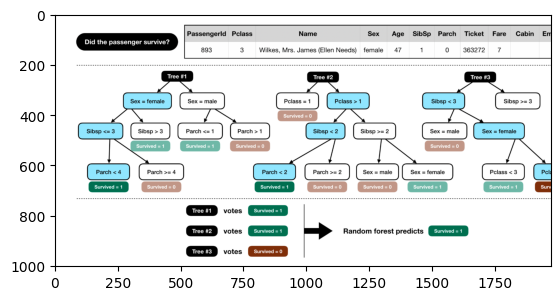

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# กำหนด path ของรูปภาพ
img_path = '/content/drive/MyDrive/Colab Notebooks/Data set/FireShot Capture 213 - Titanic Tutorial - Kaggle - www.kaggle.com.png'

# อ่านรูปภาพจาก path ที่กำหนด
img = mpimg.imread(img_path)

# แสดงรูปภาพด้วย plt.imshow
plt.imshow(img)
plt.show()


ในอัลกอริทึม Random Forest จะมีการสุ่ม feature และข้อมูลที่ใช้ในการสร้าง Decision Tree ด้วยขนาดตัวอย่าง (bootstrap samples) และค่า split point ซึ่งจะเป็นการสุ่มเพื่อลด variance และการ overfitting ของโมเดล Decision Tree ที่เกิดจากการเห็นแบบ ๆ ของข้อมูล

เมื่อสร้าง Decision Tree แต่ละต้นขึ้นมาแล้ว โมเดล Random Forest จะนำ Decision Tree ทั้งหมดมารวมกันเพื่อให้ได้ผลลัพธ์โดยการ voting หรือเลือกผลลัพธ์ที่แตกต่างกันมาเป็นผลลัพธ์สุดท้าย ดังนั้น Random Forest นั้นไม่ใช่การ random ทั้งหมด แต่เป็นการ random feature และข้อมูลเฉพาะบางส่วนเท่านั้น

=================================

In [10]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


โค้ด model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) ใช้สร้างโมเดล RandomForestClassifier โดยกำหนด hyperparameters ดังนี้

n_estimators: จำนวนของ decision trees ใน ensemble model นี้ (default=100)
max_depth: ความลึกของ decision trees ที่ใช้ใน ensemble model นี้ (default=None)
random_state: ค่าเริ่มต้นสุ่มเลขในการสร้าง decision trees ใน ensemble model นี้ (default=None)
RandomForestClassifier คืออัลกอริทึมในกลุ่ม Ensemble Learning ซึ่งเป็นการใช้หลายๆโมเดลทำงานร่วมกันเพื่อประมวลผลและทำนายผลดีขึ้น โดยการสร้าง decision trees จำนวนมากแล้วนำมา voting หรือเลือกผลลัพธ์ที่แตกต่างกันมาเป็นผลลัพธ์ที่สุดของโมเดล ensemble นี้

การกำหนด hyperparameters ใน RandomForestClassifier จะช่วยกำหนดความสำคัญของ decision trees ที่ใช้ในการ voting หรือสร้างผลลัพธ์สุดท้าย ซึ่งหากไม่กำหนด hyperparameters อย่างชัดเจนอาจทำให้โมเดลไม่มีประสิทธิภาพหรือให้ผลลัพธ์ที่ไม่แม่นยำ

=======================

In [14]:
submission = pd.read_csv("/content/submission.csv")
print(submission)


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


โค้ด X = pd.get_dummies(train_data[features]) ใช้สร้างตัวแปร X จากข้อมูลในตัวแปร train_data โดยใช้ฟังก์ชัน get_dummies() ของ Pandas เพื่อแปลงข้อมูลที่เป็นข้อความหรือ categorical data ให้เป็นตัวเลขแบบ one-hot encoding ซึ่งเป็นการแปลงค่าของแต่ละคอลัมน์ของข้อมูลให้เป็น binary (0 หรือ 1) โดยเลือกใช้คอลัมน์แต่ละคอลัมน์ของข้อมูลในการแทนค่า และทำให้ข้อมูลที่เป็นข้อความเหล่านั้นเป็นตัวเลขที่สามารถนำมาใช้ในการสร้างโมเดลการเรียนรู้เชิงเข้ามาต่อได้

การแปลงข้อมูลแบบ one-hot encoding เป็นการแปลงข้อมูลจาก categorical data เช่นเพศ (male/female), สี (red/green/blue) หรือประเภท (category A/category B/category C) ที่เป็นข้อความหรือตัวอักษรให้กลายเป็นตัวเลข binary (0 หรือ 1) ตามความเหมาะสม เพื่อให้โมเดลสามารถเรียนรู้และทำนายผลได้ง่ายขึ้น

ในตัวอย่างที่ให้มา train_data เป็นข้อมูลที่ใช้ในการเทรนโมเดล และ features เป็นลิสต์ของคอลัมน์ที่เลือกมาใช้ในการสร้างโมเดล เมื่อทำการเรียกใช้ pd.get_dummies(train_data[features]) ก็จะสร้างตัวแปร X ที่เก็บข้อมูลที่แปลงเป็น one-hot encoding แล้วสามารถนำไปใช้ในการเรียนรู้และทำนายผลของโมเดลได้

===============================================